## Auto Correlation Function (ACF)

- <font color = blue> <b> An ACF shows the correlation of the series with itself, lagged by x time units, that Includes direct or indirect dependence information.
- <font color = blue> USe to determine the term use in MA model

## Partial Auto Correaltion Function (PACF)

- <font color = blue> <b> coorelation of the series with itself lagged by x timer units after removing effect of intervening variables, that only includes drirect dependence information.
- <font color = blue> <b> Use to determine the term used in AR model.

In [1]:
import  numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [3]:
# Loading the non stationary Data

airline = pd.read_csv("Data/airline_passengers.csv", index_col='Month', parse_dates=True)
airline.index.freq = 'MS'

In [4]:
# Stationary Data

Fem_birth = pd.read_csv("Data/DailyTotalFemaleBirths.csv", index_col='Date', parse_dates=True)
Fem_birth.index.freq = 'D'

In [6]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
Fem_birth.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [8]:
# Below lib will not show any warning going forward

import warnings
warnings.filterwarnings("ignore")

In [9]:
airline.shape

(144, 1)

### ACF

In [10]:
# ACF using Stats Model

acf(airline['Thousands of Passengers'])   # Default lags is 40

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

In [11]:
acf(Fem_birth["Births"])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

### PACF

In [12]:
# Using Yule-walker formula

pacf_yw(airline['Thousands of Passengers'], method= 'mle',)

array([ 1.        ,  0.94804734, -0.22942187,  0.03814778,  0.09378544,
        0.0736067 ,  0.0077276 ,  0.12559713,  0.08995134,  0.23248854,
        0.16605126,  0.17127442, -0.1354311 , -0.53969124, -0.02661014,
        0.09076498,  0.02495556,  0.03251557,  0.07343264,  0.04844211,
       -0.04554168,  0.04575294, -0.10017888,  0.05243494,  0.04801413,
       -0.16274616, -0.03613503,  0.06642377,  0.00617612,  0.00753714,
        0.01935049, -0.01025146, -0.01831018, -0.02900136, -0.01480497,
       -0.0477246 ,  0.04620366, -0.0666976 , -0.00229644,  0.0160981 ,
       -0.08833969])

In [18]:
pacf_yw(Fem_birth['Births'], nlags=40, method='mle')

array([ 1.        ,  0.21724118,  0.11091851,  0.05800643,  0.04543103,
        0.05504982,  0.04617438,  0.15648712,  0.05939139, -0.02509098,
       -0.00890434,  0.00618762, -0.06821152,  0.00494821,  0.05147711,
        0.06574724,  0.02287367, -0.02919993,  0.05161131,  0.05139698,
        0.0633241 ,  0.22244509,  0.01256544, -0.05614002,  0.0324189 ,
       -0.02083772, -0.00113261,  0.07414523,  0.04841523,  0.00484985,
        0.03987566,  0.03980956, -0.01241855,  0.02299   ,  0.01444347,
       -0.0390127 ,  0.02148661,  0.0136852 ,  0.04949612,  0.06401633,
       -0.00526597])

In [14]:
# Using OLS Method

pacf_ols(airline['Thousands of Passengers'])

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003])

In [15]:
pacf_ols(Fem_birth["Births"])

array([ 1.        ,  0.2179641 ,  0.11388341,  0.06139271,  0.05014092,
        0.05597304,  0.0483302 ,  0.16061715,  0.061602  , -0.0245556 ,
       -0.00774957,  0.00782231, -0.07054357,  0.00367697,  0.05073901,
        0.06869818,  0.02855912, -0.03000743,  0.04890835,  0.05079005,
        0.06672663,  0.23464568,  0.01251561, -0.05701977,  0.03051524,
       -0.03035958, -0.00790227,  0.08244362,  0.05410409,  0.00122559,
        0.04213413,  0.03829265, -0.0147851 ,  0.02911748,  0.01617994,
       -0.03759518,  0.03129664,  0.01440593,  0.05191662,  0.07161683,
       -0.00544217])

### Plotting ACF and PACF

In [23]:
from pandas.plotting import lag_plot

In [25]:
#help(lag_plot)

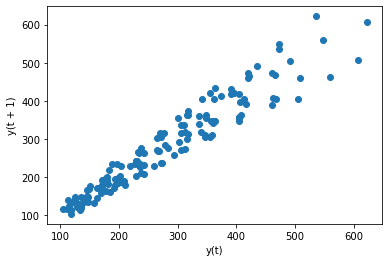

In [22]:
# Plotting the non stationary Data

lag_plot(airline["Thousands of Passengers"]);

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

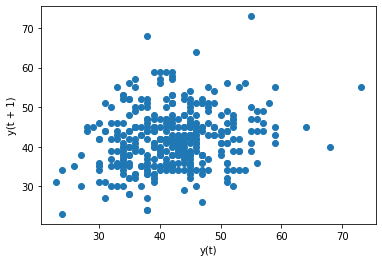

In [21]:
# Plotting the Stationary Data

lag_plot(Fem_birth["Births"])

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

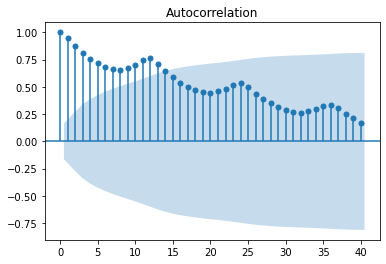

In [27]:
# Plotting ACF plot for Non Stationary Data


plot_acf(airline, lags=40,);

<font color = green> <b> Shaded region represent the 95% Confidence Interval. It suggest that the correlation value outside the Shaded Region are highly likely to be the correlation.
       The shaded Region become larger as you lags increases.

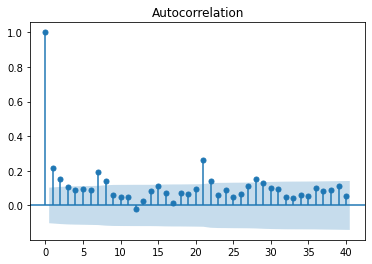

In [28]:
# ACF on the Stationary Data

plot_acf(Fem_birth, lags=40);

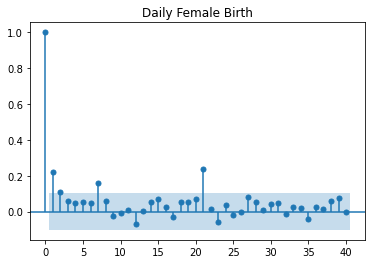

In [40]:
#Ploting PACF

plot_pacf(Fem_birth, lags=40, title="Daily Female Birth");